In [6]:
import numpy as np
import pandas as pd

In [7]:
path = r"https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB" 
df = pd.read_csv(path)

In [8]:
X=df.drop("price",axis=1)
y=df["price"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=52)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5696, 107) (1424, 107) (5696,) (1424,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_poly = sc.transform(X_train)
X_test_poly = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [14]:
lr = LinearRegression()
lr.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([114.  , 122.  ,  79.  , ...,  67.  ,  45.  ,  80.99])

In [22]:
y_test

4281    114.00
430     122.00
2630     79.00
5929     53.00
1514     14.04
         ...  
6393     45.00
4459     88.00
5058     67.00
6084     45.00
3976     80.99
Name: price, Length: 1424, dtype: float64

In [23]:
lr.score(X_test_poly,y_test)

1.0

In [25]:
y_pred = lr.predict(X_test_poly)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
print(mse,rmse)

2.150959996268819e-26 1.4666151493383733e-13


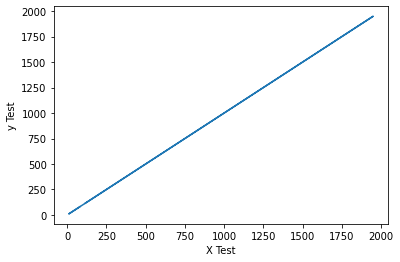

In [29]:
import matplotlib.pyplot as plt
plt.plot(y_pred,y_test)
plt.xlabel("X Test")
plt.ylabel('y Test')
plt.show()